In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import NuSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier

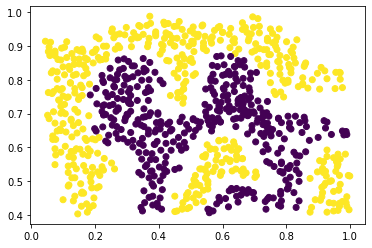

In [4]:
#数据集划分
data=loadmat('data1.mat')
X = data['X']
Y = data['y']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=1)
plt.scatter(X[:,0],X[:,1],c=Y.flatten())#可视化数据集

In [10]:
#定义基分类器
weak_classifier0 = DecisionTreeClassifier()
weak_classifier1 = AdaBoostClassifier()
weak_classifier2 = BernoulliNB()
weak_classifier3 = ExtraTreeClassifier()
weak_classifier4 = ExtraTreesClassifier()
weak_classifier5 = MultinomialNB()
weak_classifier6 = NuSVC()#去掉.R
weak_classifier7 = Perceptron()#去掉.R
weak_classifier8 = RandomForestClassifier()#最强
weak_classifier9 = RidgeClassifierCV()#去掉。R
weak_classifier10 = SGDClassifier()#去掉。R

In [11]:
#定义AdaBoost分类器
model = AdaBoostClassifier(
    base_estimator=weak_classifier8,#定义的基分类器
    n_estimators = 50,#基分类器的个数 默认50
    learning_rate = 0.5,#学习率 默认为1
    algorithm='SAMME.R'
)
model.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=0.5)

验证集准确率： 0.9845559845559846


Text(0.5, 1.0, 'adaboost')

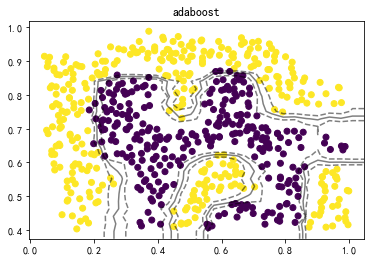

In [12]:
#计算准确度
# train_data = model.predict(X_train)
test_data = model.predict(X_test)
# print(accuracy_score(y_train,train_data))
print("验证集准确率：",accuracy_score(y_test,test_data))
#绘制决策边界
# 绘制分割超平面和样本集分类结果
plt.scatter(X_train[:,0], X_train[:,1], c=y_train.flatten()) # 散点图，根据 y值设置不同颜色
ax = plt.gca()  # 移动坐标轴
xlim = ax.get_xlim()  # 获得Axes的 x坐标范围
ylim = ax.get_ylim()  # 获得Axes的 y坐标范围
xx = np.linspace(xlim[0], xlim[1], 30)  # 创建等差数列，从 start 到 stop，共 num 个
yy = np.linspace(ylim[0], ylim[1], 30)  #
YY, XX = np.meshgrid(yy, xx)  # 生成网格点坐标矩阵 XUPT
xy = np.vstack([XX.ravel(), YY.ravel()]).T  # 将网格矩阵展平后重构为数组
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])  # 绘制决策边界和分隔
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.title("adaboost")

In [19]:
#随机森林
from sklearn.ensemble import RandomForestClassifier

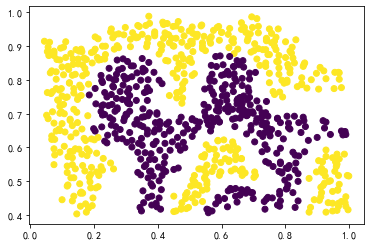

In [20]:
data1=loadmat('data1.mat')
X1 = data['X']
Y1 = data['y']
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,Y1,test_size=0.3,train_size=0.7,random_state=1)
plt.scatter(X1[:,0],X1[:,1],c=Y1.flatten())

In [21]:
model_random = RandomForestClassifier(n_estimators=5,random_state=2)
#训练数据
model_random.fit(X_train1,y_train1)

print(model_random.estimators_)

[DecisionTreeClassifier(max_features='auto', random_state=1872583848), DecisionTreeClassifier(max_features='auto', random_state=794921487), DecisionTreeClassifier(max_features='auto', random_state=111352301), DecisionTreeClassifier(max_features='auto', random_state=1853453896), DecisionTreeClassifier(max_features='auto', random_state=213298710), DecisionTreeClassifier(max_features='auto', random_state=1922988331), DecisionTreeClassifier(max_features='auto', random_state=1869695442), DecisionTreeClassifier(max_features='auto', random_state=2081981515)]


<ipython-input-21-5b6932838eb7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random.fit(X_train1,y_train1)


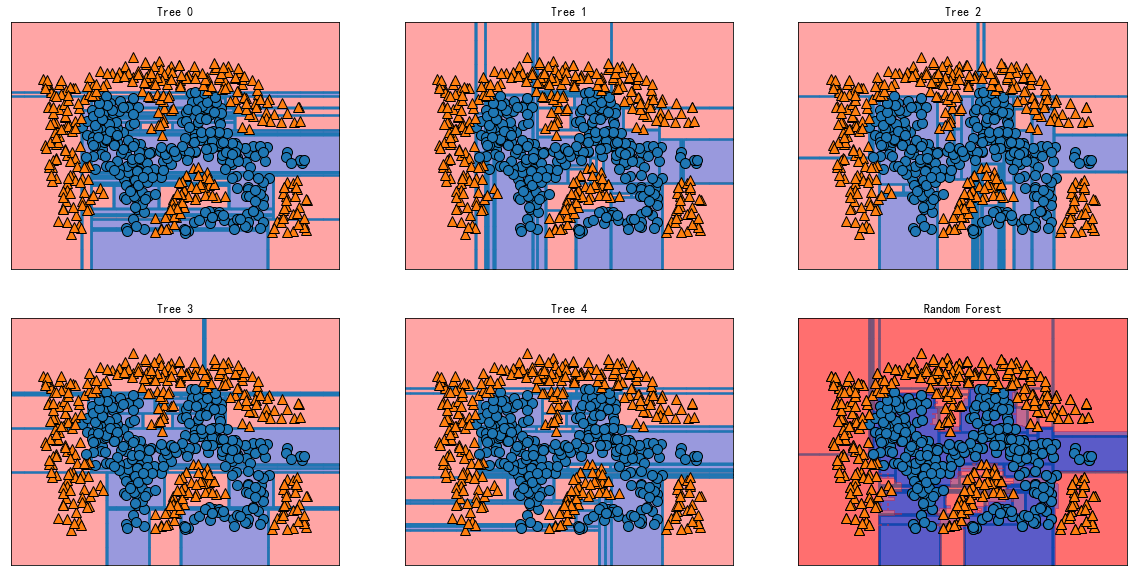

In [22]:
#将每颗树学到的决策边界可视化，也将它们的总预测(即整个森林的预测)可视化
#生成 2 行 3 列的6个子图，子图的大小为20*10
fig,axes = plt.subplots(2, 3, figsize=(20, 10))
#参数 axes.ravel()表示 6 个画布, forest.estimators_表示 5 个森林, enumerate()方法，输出每个元素的下标和其对应的值
for i,(ax,tree) in enumerate(zip(axes.ravel(), model_random.estimators_)):
    ax.set_title('Tree {}'.format(i))     #设置图形标题
    #画出树的部分图，数据为训练集，树为随机森林生成的子树，画在ax子图中
    mglearn.plots.plot_tree_partition(X_train1, y_train1.flatten(), tree, ax=ax)

#画出随机森林的分界线
mglearn.plots.plot_2d_separator(model_random, X_train1, fill=True, ax=axes[-1, -1], alpha=.4)

#设置标题
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X_train1[:, 0], X_train1[:, 1], y_train1.flatten())         #添加数据点, 横坐标，纵坐标，结果

In [23]:
# 使用Iris数据集分别对adaboost和随机森林进行训练。
from sklearn.datasets import load_iris
X2,y2 = load_iris(return_X_y=True,as_frame=True)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.3,train_size=0.7,random_state=1)
model.fit(X_train2,y_train2)
model_random.fit(X_train2,y_train2)
iris_test1 = model.predict(X_test2)
iris_test2 = model_random.predict(X_test2)
print(accuracy_score(y_test2,iris_test1))
print(accuracy_score(y_test2,iris_test2))

0.9555555555555556
0.9555555555555556


In [ ]:
# x222 = [10,20,30,40,50]
# y222 = [0.9652509652509652,0.972972972972973,0.9652509652509652,0.9652509652509652,0.9652509652509652]
# plt.plot(x222,y222)